# Problem Statement: 

A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 
Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.
Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.

We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. 

They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. 
They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). 
The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers. 

## Exercise:

Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.  

### Points to Remember:

* There are no null values in the dataset. 
*	There may be some customers with no loan history. 
*	The dataset is imbalanced. Label ‘1’ has approximately 87.5% records, while, label ‘0’ has approximately 12.5% records.
*	For some features, there may be values which might not be realistic. You may have to observe them and treat them with a suitable explanation.
*	You might come across outliers in some features which you need to handle as per your understanding. Keep in mind that data is expensive and we cannot lose more than 7-8% of the data.  
Find Enclosed the Data Description File and The Sample Data for the Modeling Exercise.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, power_transform
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, plot_roc_curve
import pickle
import warnings
warnings.filterwarnings('ignore')

# Data Description & Understanding.

In [2]:
data = pd.read_csv('Data file.csv')
data

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


Data Set has one unwanted column with the name of ```Unnamed: 0``` which is representing the Index of the data. We do not need this in our data set so we are going to drop it.

In [3]:
data = data.drop(columns = ['Unnamed: 0'])

In [4]:
data.head(5)

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [5]:
data.shape

(209593, 36)

In [6]:
data.isna().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

In [8]:
data.iloc[0:,:18]

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404
209589,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038
209590,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592
209591,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941


In [9]:
data.iloc[0:,18:]

,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [10]:
data.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


## Basic Data Information.

* Data set has 209593 rows & 37 Columns, pretty big data set.
* We felt no Use of ```Unnamed : 0``` column as it was just an predefined index of the data set, So we droped that.
* Data set has no missing values as it was mentioned in use case, checked the same & found the same.
* Data set has 3 object data types column.
1. ```mssidn```
2. ```pcircle```
3. ```pdate```
* After extracting date, month & year from date there will be 2 object data type column only. We feel no use of mssidn column as it is mobile no. of the customers and we feel that mobile no. will play no role in predicting fraud cases. So we will drop this column.
* Rest of the columns are continouos data having integer or float data type.
* label column is our target column having 2 categories 0 & 1. 0 for fraud & 1 for no fraud.
* Data Description shows that maximum of column's data are disrupted heavily. Standard Deviation are greater than mean value in maximum of columns. We will later study this.

First we will extract the date, month & year from the date column and will drop the date column to make it integer data type, than we will analyse the categorical column ```pcircle``` & will encode it after these 2 steps we will start our EDA process.

In [11]:
# extracting day, month & year from pdate column.

# pdate column is not in date time format so applying pandas inbuilt to_datetime function errors = coerce to define it.
data['pdate'] = pd.to_datetime(data['pdate'], errors = 'coerce') 
data['day'] = data['pdate'].dt.day
data['month'] = data['pdate'].dt.month
data['year'] = data['pdate'].dt.month
data = data.drop(columns = ['pdate'])

Date, Month & Year has been extracted from the pdate column in saperate column for day, month & year.We have droped the pdate column as it is of no use now.

In [12]:
data['msisdn'].describe()

count          209593
unique         186243
top       04581I85330
freq                7
Name: msisdn, dtype: object

In [13]:
# droping the msisdn column as it is mobile no. of customers and we don't need this column.
data = data.drop(columns = ['msisdn'])

# Exploratory Data Analysis.

In [14]:
data['pcircle'].describe()

count     209593
unique         1
top          UPW
freq      209593
Name: pcircle, dtype: object

In [15]:
data['pcircle'].value_counts()

UPW    209593
Name: pcircle, dtype: int64

<AxesSubplot:xlabel='pcircle', ylabel='count'>

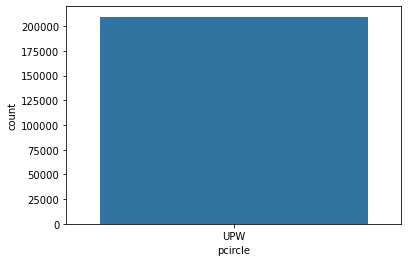

In [16]:
sns.countplot(data['pcircle'])

In [17]:
data = data.drop(columns = ['pcircle'])

```pcircle``` column had only 1 unique value **UPW** which is a some kind of telecom circle. Because it has only 1 unique value thus it's relation with all other feature column and target column would be same, So the saturated column is for no use in predicting the fraud cases, hence we droped the column from data set.

In [18]:
data['label'].describe()

count    209593.000000
mean          0.875177
std           0.330519
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: label, dtype: float64

In [19]:
data['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

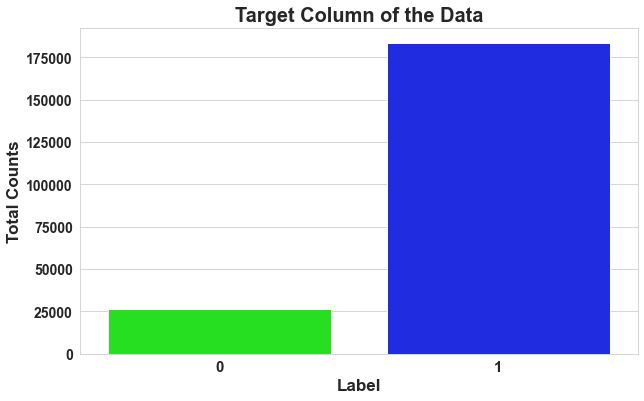

In [20]:
# countplot for label column.
plt.figure(figsize = (10,6))
sns.set_style('whitegrid')
sns.countplot(data['label'], palette = 'hsv')
plt.title('Target Column of the Data', fontweight = 'bold', fontsize = 20)
plt.xlabel('Label', fontweight = 'bold', fontsize = 17)
plt.ylabel('Total Counts', fontweight = 'bold', fontsize = 17)
plt.xticks(fontweight = 'bold', fontsize = 15)
plt.yticks(fontweight = 'bold', fontsize = 14)
plt.show()

As we know in our target column ```label``` have 2 categories 0 & 1. 0 represents the fraud being done & 1 represents the money was paid back. We can see in the countplot of the label column that the count of 0 and 1 has huge difference, which shows that the class column is highly imbalanced, we need to balance the data before sending it to machine learning algorithm.

In [21]:
# making a dataframe of continuous features for data visualization
cont_features = data.drop(columns = ['label', 'day', 'month', 'year'])

In [22]:
cont_features

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,...,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,...,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,...,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,...,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,...,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000
209589,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,...,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000
209590,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,...,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333
209591,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,...,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000


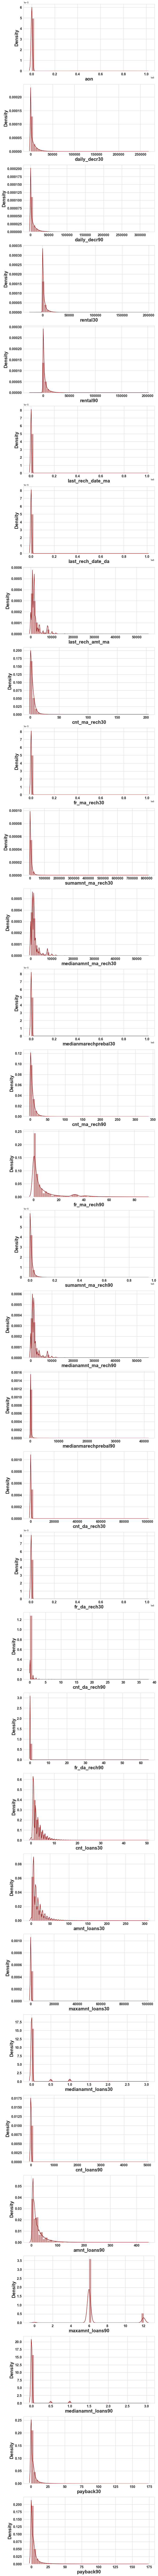

In [23]:
# for loop for plotting distribution plot of all continuous columns.
plt.figure(figsize = (10,200))
plotnumber = 1

for columns in cont_features:
    if plotnumber <= 32:
        ax = plt.subplot(32,1, plotnumber)
        sns.distplot(cont_features[columns], color = 'darkred')
        plt.xlabel(columns,fontweight = 'bold', fontsize = 20)
        plt.ylabel('Density', fontweight = 'bold', fontsize = 20)
        plt.xticks(fontweight = 'bold', fontsize = 15)
        plt.yticks(fontweight = 'bold', fontsize = 15)
    plotnumber+=1
plt.show()

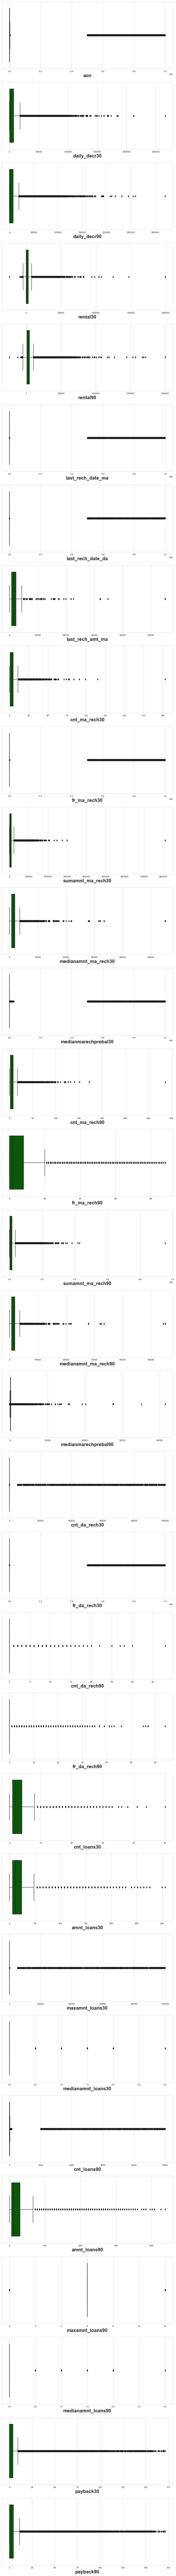

In [24]:
# for loop for plotting box plot of all continuous columns.
plt.figure(figsize = (13,200))
plotnumber = 1

for columns in cont_features:
    if plotnumber <= 32:
        ax = plt.subplot(32,1, plotnumber)
        sns.boxplot(cont_features[columns], color = 'darkgreen')
        plt.xlabel(columns,fontweight = 'bold', fontsize = 20)

    plotnumber+=1
plt.show()

## Univariate Data Analysis Conclusion.

With the help of above distribution plot & Boxplot univariate analysis of all the continuous feature columns of data set we found that distribution of the data in columns are quite complicated. Almost all the columns are heavily right skewed, we found that is because in almost all the column upto 75% & even 100% of the data are distributed in a certain range but there are some data points available in the column which are exceptionaly far-far higher in positive side than the 100% of the data. which is making it heavily right skewed data distribution and this is the only reason why in almost all the columns mean value is smaller than te standard deviation. There are some of the columns also which are even left skewed along with right skeweness like ```rental30```, ```rental90```, ```maxamnt_loans90```. 

There are some columns in the data set whose 25%, 50% & 75%, or i would say very fewer than 100% data are distributed on a single point and than there is a maximum or minimum value different than those of single points that is making them disrupted data distribution.

Hence there is a lots of outliers in all of the feature columns. We can't afford to remove such a amount of outliers from the columns that is why we will try to sort the skewness f the column by scikit's ```power_transform(yeo-johnson)``` method.

In [25]:
data.corr()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,day,month,year
label,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,0.237331,...,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183,0.006825,0.154949,0.154949
aon,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,-0.003148,...,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203,0.000662,-0.001863,-0.001863
daily_decr30,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,0.451385,...,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175,0.006477,0.518664,0.518664
daily_decr90,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,0.426707,...,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800,-0.021508,0.539410,0.539410
rental30,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,0.233343,...,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147,0.036537,0.365699,0.365699
rental90,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,0.230260,...,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501,0.008941,0.429407,0.429407
last_rech_date_ma,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,0.004311,...,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583,0.000560,-0.001207,-0.001207
last_rech_date_da,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,0.001549,...,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417,0.000631,-0.001800,-0.001800
last_rech_amt_ma,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,-0.002662,...,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260,0.028883,0.096919,0.096919
cnt_ma_rech30,0.237331,-0.003148,0.451385,0.426707,0.233343,0.230260,0.004311,0.001549,-0.002662,1.000000,...,-0.067011,0.014703,0.685257,0.174104,-0.071451,0.043617,0.017362,0.068643,0.156148,0.156148


In [26]:
data.iloc[0:,:20].corr()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30
label,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,0.237331,0.001330,0.202828,0.141490,-0.004829,0.236392,0.084385,0.205793,0.120855,0.039300,0.003827
aon,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,-0.003148,-0.001163,0.000707,0.004306,0.003930,-0.002725,0.004401,0.001011,0.004909,-0.000859,0.001564
daily_decr30,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,0.451385,-0.000577,0.636536,0.295356,-0.001153,0.587338,-0.078299,0.762981,0.257847,0.037495,0.000700
daily_decr90,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,0.426707,-0.000343,0.603886,0.282960,-0.000746,0.593069,-0.079530,0.768817,0.250518,0.036382,0.000661
rental30,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,0.233343,-0.001219,0.272649,0.129853,-0.001415,0.312118,-0.033530,0.342306,0.110356,0.027170,-0.001105
rental90,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,0.230260,-0.000503,0.259709,0.120242,-0.001237,0.345293,-0.036524,0.360601,0.103151,0.029547,-0.000548
last_rech_date_ma,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,0.004311,-0.001629,0.002105,-0.001358,0.004071,0.004263,0.001414,0.002243,-0.000726,-0.001086,-0.003467
last_rech_date_da,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,0.001549,0.001158,0.000046,0.001037,0.002849,0.001272,0.000798,-0.000414,0.000219,0.004158,-0.003628
last_rech_amt_ma,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,-0.002662,0.002876,0.440821,0.794646,-0.002342,0.016707,0.106267,0.418735,0.818734,0.124646,-0.001837
cnt_ma_rech30,0.237331,-0.003148,0.451385,0.426707,0.233343,0.230260,0.004311,0.001549,-0.002662,1.000000,0.001669,0.656986,-0.011792,0.000082,0.886433,-0.152759,0.584060,-0.051347,0.013463,0.002306


In [27]:
data.iloc[0:,20:].corr()

,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,day,month,year
fr_da_rech30,1.000000,0.000770,0.005505,-0.003212,-0.003395,-0.001070,-0.001141,-0.001623,-0.001593,-0.001069,-0.001623,0.001709,-0.000725,0.000538,-0.002303,-0.002303
cnt_da_rech90,0.000770,1.000000,0.348885,0.017976,0.026249,-0.001855,-0.003351,0.000907,0.020909,0.038019,-0.003094,0.013430,0.024046,0.060286,0.023142,0.023142
fr_da_rech90,0.005505,0.348885,1.000000,0.010021,0.014935,-0.000754,-0.002234,0.001993,0.011501,0.021785,-0.000949,0.000354,0.001226,0.039979,0.013594,0.013594
cnt_loans30,-0.003212,0.017976,0.010021,1.000000,0.957742,0.000251,-0.093146,0.015595,0.852905,0.143590,-0.097871,0.067842,0.033369,0.077170,0.097415,0.097415
amnt_loans30,-0.003395,0.026249,0.014935,0.957742,1.000000,-0.000073,-0.078531,0.014625,0.897961,0.329170,-0.087989,0.060425,0.030901,0.070131,0.162711,0.162711
maxamnt_loans30,-0.001070,-0.001855,-0.000754,0.000251,-0.000073,1.000000,0.007782,0.003987,-0.001850,-0.000487,0.009330,-0.001512,-0.000915,0.002531,-0.003801,-0.003801
medianamnt_loans30,-0.001141,-0.003351,-0.002234,-0.093146,-0.078531,0.007782,1.000000,-0.003670,-0.067580,0.058378,0.911604,-0.006007,0.003178,-0.003479,0.048908,0.048908
cnt_loans90,-0.001623,0.000907,0.001993,0.015595,0.014625,0.003987,-0.003670,1.000000,0.017697,0.001450,-0.002571,0.000587,-0.000476,0.001969,0.003577,0.003577
amnt_loans90,-0.001593,0.020909,0.011501,0.852905,0.897961,-0.001850,-0.067580,0.017697,1.000000,0.323417,-0.095160,0.052142,0.029653,0.038509,0.318715,0.318715
maxamnt_loans90,-0.001069,0.038019,0.021785,0.143590,0.329170,-0.000487,0.058378,0.001450,0.323417,1.000000,0.032256,0.013376,0.029679,0.015594,0.293784,0.293784


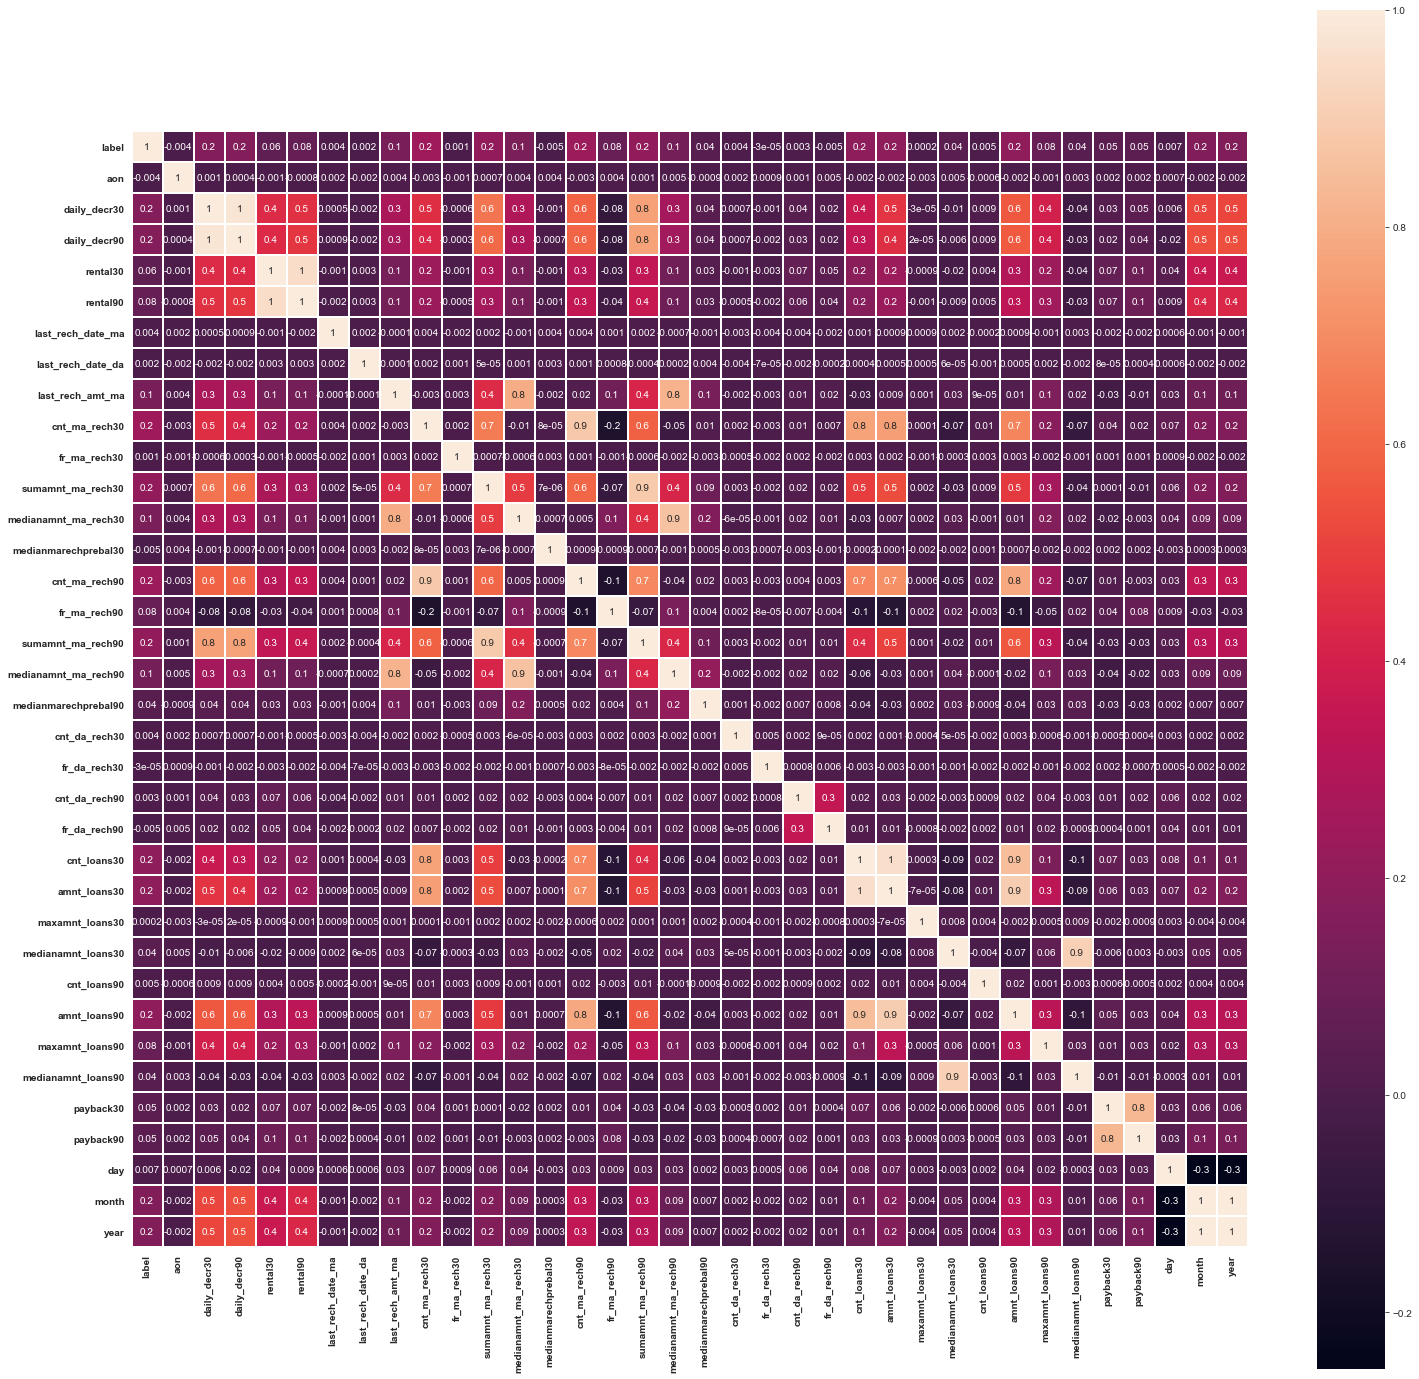

In [28]:
plt.figure(figsize = (25,25))
sns.heatmap(data.corr(), annot = True, fmt = '.1g', linewidth = 1, linecolor = 'white', square = True)
plt.xticks(fontweight = 'bold', fontsize = 10)
plt.yticks(fontweight = 'bold', fontsize = 10)
plt.show()

From the heat map we found that relation of all the features column with target column are not much high, maximum it is going upto 0.2. But we can see some of lightcolor highlighted square in the heatmap which is showing relations of feature column with another feature column, & light color is showing some high relations between them, which is greater than 0.4 is most of the cases. So here we can interpret that some of pairs of columns are highly related with each other.



# Data Preprocessing.

### Removing Skewness.

In [29]:
# checking skewness
cont_features.skew()

aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans90          1.678304
medianamnt_loa

From the above skewness table, we can see that every single column's skewness value is much greater than 0.5, which is showing that all the column is highly right side skewed. We will try to sort the skewness by scikit's ```power_transform```, ```yeo-johnson``` method.

In [30]:
# removing skewness with power_transform. Using yeo-johnson method because 0 is is in many columns.
new_df = power_transform(cont_features, method = 'yeo-johnson')

# making data frame of transformed data having column name same as it was before.
new_df = pd.DataFrame(new_df, columns = cont_features.columns)
cont_features = new_df
cont_features

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,-0.177112,0.332156,0.299181,-0.580786,-0.568411,-0.025513,-0.074007,0.083417,-0.275617,1.603299,...,0.011773,-0.097563,-0.101998,-0.269051,-0.186805,-0.250850,-0.285611,-0.248272,1.813266,1.783964
1,0.036453,1.116021,1.045084,0.339736,0.148082,0.191368,-0.074007,1.501277,-0.799355,-1.128949,...,-0.913019,-0.097563,1.182431,-0.269051,-1.034294,-0.250850,2.325828,-0.248272,-0.937405,-1.018917
2,-0.034659,-0.007508,-0.028203,-0.366965,-0.409047,0.000044,-0.074007,0.083417,-0.799355,-1.128949,...,-0.913019,-0.894782,-0.101998,-0.269051,-1.034294,-1.005714,-0.285611,-0.248272,-0.937405,-1.018917
3,-0.199213,-1.031486,-1.022743,-0.603059,-0.597731,0.299360,-0.074007,-0.291052,-1.694157,-1.128949,...,0.011773,-0.097563,-0.101998,-0.269051,-0.186805,-0.250850,-0.285611,-0.248272,-0.937405,-1.018917
4,0.114880,-0.682337,-0.680928,-0.310473,-0.364212,0.021231,-0.074007,0.449550,0.992270,0.188872,...,1.570451,1.454951,-0.101998,-0.269051,1.180312,1.097886,-0.285611,-0.248272,0.639236,0.431438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,-0.097931,-0.680457,-0.679097,-0.313194,-0.366369,-0.058426,-0.074007,1.051183,0.096120,0.188872,...,0.011773,-0.097563,-0.101998,-0.269051,-0.186805,-0.250850,-0.285611,-0.248272,0.094998,-0.098305
209589,0.152333,-0.950215,-0.942830,-0.140654,-0.229845,0.021231,-0.074007,-0.429509,0.384542,-0.239912,...,0.556347,0.393236,-0.101998,-0.269051,0.300689,0.192260,-0.285611,-0.248272,0.094998,-0.098305
209590,0.134577,1.100455,1.033424,0.825400,1.022476,0.000044,-0.074007,0.083417,0.620252,1.087596,...,0.924658,1.454951,1.182431,-0.269051,1.038116,1.358455,2.325828,-0.248272,0.974292,0.752939
209591,0.309101,1.136057,1.068381,-0.515607,-0.389820,-0.025513,1.677239,-0.429509,0.620252,0.649604,...,0.011773,0.393236,1.182431,-0.269051,0.300689,0.503740,2.325828,-0.248272,-0.937405,1.337831


In [31]:
cont_features.skew()

aon                       1.654517
daily_decr30             -6.582717
daily_decr90             -7.080193
rental30                 -1.022844
rental90                 -0.962717
last_rech_date_ma        -5.362529
last_rech_date_da      -106.606655
last_rech_amt_ma         -0.061262
cnt_ma_rech30            -0.000145
fr_ma_rech30              0.165015
sumamnt_ma_rech30        -0.291322
medianamnt_ma_rech30     -0.189628
medianmarechprebal30     -0.119058
cnt_ma_rech90            -0.002465
fr_ma_rech90              0.142952
sumamnt_ma_rech90        -0.192158
medianamnt_ma_rech90     -0.044604
medianmarechprebal90      7.506286
cnt_da_rech30             6.925820
fr_da_rech30             11.390665
cnt_da_rech90             6.006577
fr_da_rech90             15.469700
cnt_loans30               0.036243
amnt_loans30              0.001948
maxamnt_loans30          -1.680107
medianamnt_loans30        3.447735
cnt_loans90               0.105580
amnt_loans90             -0.008988
maxamnt_loans90     

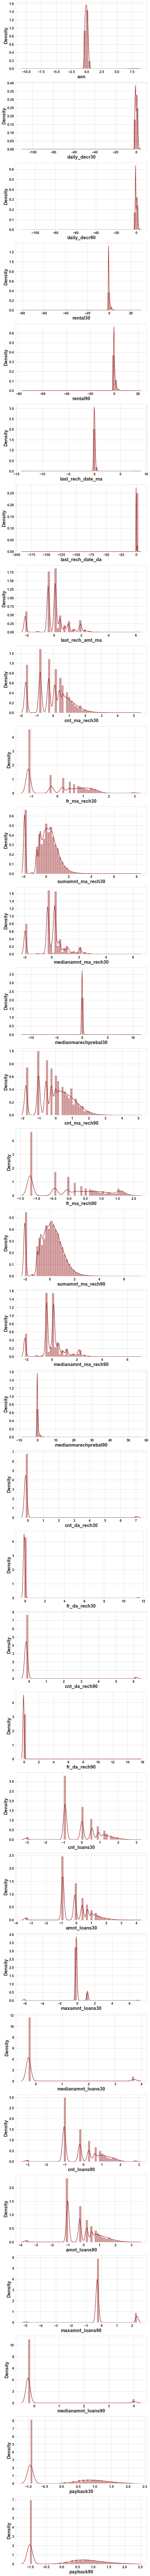

In [32]:
# for loop for plotting distribution plot of all continuous columns.
plt.figure(figsize = (10,200))
plotnumber = 1

for columns in cont_features:
    if plotnumber <= 32:
        ax = plt.subplot(32,1, plotnumber)
        sns.distplot(cont_features[columns], color = 'darkred')
        plt.xlabel(columns,fontweight = 'bold', fontsize = 20)
        plt.ylabel('Density', fontweight = 'bold', fontsize = 20)
        plt.xticks(fontweight = 'bold', fontsize = 15)
        plt.yticks(fontweight = 'bold', fontsize = 15)
    plotnumber+=1
plt.show()

We have successfully applied the power_transform to remove the skewness & in many of columns it worked significantly & reduced the skewness but not all column has got sorted because of nature of those column's data distribution which we had discussed earlier. Although we will consider this process & we'll move ahead towards the model building from here.

In [33]:
# adding four columns into data set back, those were removed from data set for visualization
cont_features['day'] = data['day']
cont_features['month'] = data['month']
cont_features['year'] = data['year']
cont_features['label'] = data['label']
Data = cont_features
Data

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,day,month,year,label
0,-0.177112,0.332156,0.299181,-0.580786,-0.568411,-0.025513,-0.074007,0.083417,-0.275617,1.603299,...,-0.186805,-0.250850,-0.285611,-0.248272,1.813266,1.783964,20,7,7,0
1,0.036453,1.116021,1.045084,0.339736,0.148082,0.191368,-0.074007,1.501277,-0.799355,-1.128949,...,-1.034294,-0.250850,2.325828,-0.248272,-0.937405,-1.018917,10,8,8,1
2,-0.034659,-0.007508,-0.028203,-0.366965,-0.409047,0.000044,-0.074007,0.083417,-0.799355,-1.128949,...,-1.034294,-1.005714,-0.285611,-0.248272,-0.937405,-1.018917,19,8,8,1
3,-0.199213,-1.031486,-1.022743,-0.603059,-0.597731,0.299360,-0.074007,-0.291052,-1.694157,-1.128949,...,-0.186805,-0.250850,-0.285611,-0.248272,-0.937405,-1.018917,6,6,6,1
4,0.114880,-0.682337,-0.680928,-0.310473,-0.364212,0.021231,-0.074007,0.449550,0.992270,0.188872,...,1.180312,1.097886,-0.285611,-0.248272,0.639236,0.431438,22,6,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,-0.097931,-0.680457,-0.679097,-0.313194,-0.366369,-0.058426,-0.074007,1.051183,0.096120,0.188872,...,-0.186805,-0.250850,-0.285611,-0.248272,0.094998,-0.098305,17,6,6,1
209589,0.152333,-0.950215,-0.942830,-0.140654,-0.229845,0.021231,-0.074007,-0.429509,0.384542,-0.239912,...,0.300689,0.192260,-0.285611,-0.248272,0.094998,-0.098305,12,6,6,1
209590,0.134577,1.100455,1.033424,0.825400,1.022476,0.000044,-0.074007,0.083417,0.620252,1.087596,...,1.038116,1.358455,2.325828,-0.248272,0.974292,0.752939,29,7,7,1
209591,0.309101,1.136057,1.068381,-0.515607,-0.389820,-0.025513,1.677239,-0.429509,0.620252,0.649604,...,0.300689,0.503740,2.325828,-0.248272,-0.937405,1.337831,25,7,7,1


### Data Scaling.

In [34]:
# splitting the data into features and label
x = Data.drop(columns = ['label'])
y = Data['label']

# scaling the data witn MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

We have done with the standardize the data, but it did not do any changes in the data set because we already had transformed our data set by ```power_transform``` method to remove skewness. All right so from here we will go for model building, first we will find the best random state for logistic regression and after finding the best randome state we will split the data into training data & testing data to train the model in different algorithms & to test the trained model 

### Finding The Best Random State.

In [35]:
max_accu = 0
best_rs = 0

for i in range(1,500):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = i)
    log_reg = LogisticRegression()
    log_reg.fit(x_train, y_train)
    y_pred_log = log_reg.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred_log)
    if accuracy > max_accu:
        max_accu = accuracy
        best_rs = i
print('Maximum Accuracy is :', max_accu, 'at random state ', best_rs)

Maximum Accuracy is : 0.8849023836332754 at random state  77


### Creating Train Test Split.

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = 77)

# Machine Learning Model Building.


### Model 1. Logistic Regression.

In [37]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
y_pred_log = log_reg.predict(x_test)

print('Confusion Matrix for Logistic Regression Model is :\n\n', confusion_matrix(y_test, y_pred_log),'\n')

print('Accuracy Score for Logistic Regression Model is :\n\n', accuracy_score(y_test, y_pred_log),'\n')

print('Classification Report for the Logistic Regression :\n\n', classification_report(y_test, y_pred_log))

Confusion Matrix for Logistic Regression Model is :

 [[  835  5590]
 [  441 45533]] 

Accuracy Score for Logistic Regression Model is :

 0.8849023836332754 

Classification Report for the Logistic Regression :

               precision    recall  f1-score   support

           0       0.65      0.13      0.22      6425
           1       0.89      0.99      0.94     45974

    accuracy                           0.88     52399
   macro avg       0.77      0.56      0.58     52399
weighted avg       0.86      0.88      0.85     52399



### Model 2. K-Nearest Neighbors Classifier.

In [38]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

print('Confusion Matrix for Knn Model is :\n', confusion_matrix(y_test, y_pred_knn),'\n')
print('Accuracy Score for Knn Model is :\n', accuracy_score(y_test, y_pred_knn),'\n')
print('Classification Report for the Knn Model is :\n', classification_report(y_test, y_pred_knn),'\n')

Confusion Matrix for Knn Model is :
 [[ 2953  3472]
 [ 1777 44197]] 

Accuracy Score for Knn Model is :
 0.8998263325635986 

Classification Report for the Knn Model is :
               precision    recall  f1-score   support

           0       0.62      0.46      0.53      6425
           1       0.93      0.96      0.94     45974

    accuracy                           0.90     52399
   macro avg       0.78      0.71      0.74     52399
weighted avg       0.89      0.90      0.89     52399
 



### Model 3. Decision Tree Classifier.

In [39]:
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)
y_pred_dt = DT.predict(x_test)

print('Confusion Matrix for Decision Tree Model is :\n', confusion_matrix(y_test, y_pred_dt),'\n')
print('Accuracy Score for Decision Tree Model is :\n', accuracy_score(y_test, y_pred_dt),'\n')
print('Classification Report for Decision Tree Model is :\n', classification_report(y_test, y_pred_dt), '\n')

Confusion Matrix for Decision Tree Model is :
 [[ 3595  2830]
 [ 3278 42696]] 

Accuracy Score for Decision Tree Model is :
 0.8834328899406477 

Classification Report for Decision Tree Model is :
               precision    recall  f1-score   support

           0       0.52      0.56      0.54      6425
           1       0.94      0.93      0.93     45974

    accuracy                           0.88     52399
   macro avg       0.73      0.74      0.74     52399
weighted avg       0.89      0.88      0.89     52399
 



### Model 4. Random Forest Classifier.

In [60]:
RF = RandomForestClassifier()
RF.fit(x_train, y_train)
y_pred_rf = RF.predict(x_test)

print('Confusion Matrix for Random Forest Model is :\n', confusion_matrix(y_test, y_pred_rf),'\n')
print('Accuracy Score for Random Forest Model is :\n', accuracy_score(y_test, y_pred_rf),'\n')
print('Classification Report for the Random Forest Model is :\n', classification_report(y_test, y_pred_rf))

Confusion Matrix for Random Forest Model is :
 [[ 3398  3027]
 [ 1013 44961]] 

Accuracy Score for Random Forest Model is :
 0.9228992919712208 

Classification Report for the Random Forest Model is :
               precision    recall  f1-score   support

           0       0.77      0.53      0.63      6425
           1       0.94      0.98      0.96     45974

    accuracy                           0.92     52399
   macro avg       0.85      0.75      0.79     52399
weighted avg       0.92      0.92      0.92     52399



### Model 5. Support Vector Machine Classification.

In [41]:
svc = SVC()
svc.fit(x_train, y_train)
y_pred_svc = svc.predict(x_test)

print('Confusion Matrix for the Support Vector Model is :\n', confusion_matrix(y_test, y_pred_svc),'\n')
print('Accuracy Score for the Support Vector Model is :\n', accuracy_score(y_test, y_pred_svc),'\n')
print('Classification Report for the Support Vector Model is :\n', classification_report(y_test, y_pred_svc))

Confusion Matrix for the Support Vector Model is :
 [[ 1687  4738]
 [  871 45103]] 

Accuracy Score for the Support Vector Model is :
 0.8929559724422221 

Classification Report for the Support Vector Model is :
               precision    recall  f1-score   support

           0       0.66      0.26      0.38      6425
           1       0.90      0.98      0.94     45974

    accuracy                           0.89     52399
   macro avg       0.78      0.62      0.66     52399
weighted avg       0.87      0.89      0.87     52399



So we have built 5 machine learning classification models for Micro Credit Defaulter prediction & the result from all 5 models are quite good. 4 Models exept Random Forest has given the accuracy quite closer to each other between 88% to 90%. But Random Forest Model has done acceptionally good. it has given the accuracy of 92.25% which greater than all the other models. Now we will cross validate all of our models to see if our model is overfitted model, underfitted model or it's a good model.

# Cross Validations of Model's Accuracy.

In [42]:
# cross validation for Logistic Regression Model
cvs = cross_val_score(log_reg, x_scaled, y, cv = 10)
print('Cross Validation mean score for Logistic Regression model is :', cvs.mean())

Cross Validation mean score for Logistic Regression model is : 0.8806925853784324


In [43]:
# cross validation for Knn Model
cvs = cross_val_score(knn, x_scaled, y, cv = 10)
print('Cross Validation mean score for K-Nearest Neighbor model is :', cvs.mean())

Cross Validation mean score for K-Nearest Neighbor model is : 0.8978162642786043


In [44]:
# cross validation for Decision Tree model
cvs = cross_val_score(DT, x_scaled, y, cv = 10)
print('Cross Validation ean score for Decision Tree model is :', cvs.mean())

Cross Validation ean score for Decision Tree model is : 0.8845047589732626


In [45]:
# cross validation for Random Forest Model
cvs = cross_val_score(RF, x_scaled, y, cv = 10)
print('Cross Validation mean Score for Random Forest Model is :', cvs.mean())

Cross Validation mean Score for Random Forest Model is : 0.9214763982588327


In [46]:
# cross validation for support vector machine model 
cvs = cross_val_score(svc, x_scaled, y, cv = 10)
print('Cross Validation mean score for Support Vector Classification Model is :', cvs.mean())

Cross Validation mean score for Support Vector Classification Model is : 0.8886127152011433


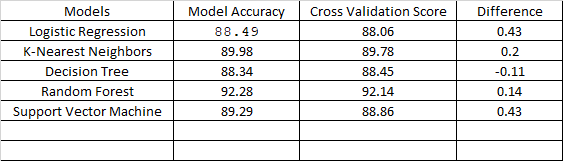

So we are done with the cross validations of the models & we have successfully validated the models. The result is quite impressive as we do not find the case of overfit or underfit to any of models, Earlier while analyzation of Target column ```label``` we found that the class data was imbalance data & we decided to balance it by oversampling so that our model will not be a victim of overfitting or underfitting but later on I forgot to oversampling the class data but while cross validation of the models I realized that I forgot to over sample the data. But here after cross validation I do not find any case of overfitting or underfitting so we are good with that. all models have given almost same cross validation score to the default model accuracy having very little difference between both. We have seen that Decision Tree model's cross validation accuracy has given greater accuracy than default model accuracy & After that Random Forest Model has very least difference between model's default accuracy & cross validation accuracy. So from here we have concluded that we have 2 best models for **Micro credit Defaulter** 1. Decision Tree Model & Random Forest Model. But if we compare Random Forest & Decision Tree Model Than we can conclude that Random Forest Model has quite great accuracy compare to Decision Tree Model & also Random Forest is not overfit or underfit model has very less difference between model accuracy & cross validation accuracy of 0.14%, So in my point of view Random Forest Model is better model among all but to test this we will do one more thing we will plot the roc curve of all the models and whichever model would have the highest Area Under The Curve we will finalize that model for our **Micro Credit Defaulter Prediction Project**.

# AUC-ROC Curve

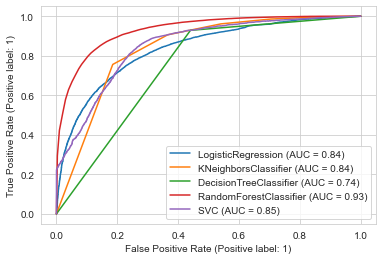

In [47]:
# Plotting roc_auc_curve

disp = plot_roc_curve(log_reg, x_test, y_test)
plot_roc_curve(knn, x_test, y_test, ax = disp.ax_)
plot_roc_curve(DT, x_test, y_test, ax = disp.ax_)
plot_roc_curve(RF, x_test, y_test, ax = disp.ax_)
plot_roc_curve(svc, x_test, y_test, ax = disp.ax_)
plt.show()

From above ROC plot we can see that Random Forest Model has the highest area under the curve hence we are going to finalize Random Forest as our Micro Cedit Defaulter Prediction Model. Now we will Hypertune the Random Forest Model to see whether we can increase our Model accuracy or not.

# Hyper Parameter Tuning.

In [50]:
# defining all the important estimators of Random Forest Algorithm for hyper tune the model.
param_grid = {'n_estimators' : [10,20,30,40,50,60,70,80,90,100], 
              'criterion' : ['gini', 'entropy'],
              'max_depth' : [2,4,6,8],
              'max_features' : ['auto', 'sqrt', 'log2'],
              'min_samples_split' : [2,4,6,8],
              'min_samples_leaf' : [1,3,5,7]
              }

In [51]:
# Training the grid_search cv with defined estimators to find best parameters to tune the algoithm
grid_search = GridSearchCV(estimator = RF, param_grid = param_grid, cv = 5, n_jobs = -1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 5, 7],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]})

In [52]:
# getting best parameters 
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 6,
 'n_estimators': 20}

In [62]:
# training and testing the random forest model with tuned estimators
rfht = RandomForestClassifier(n_estimators = 20, criterion = 'gini', max_depth = 8, max_features = 'sqrt', min_samples_leaf = 5,
                              min_samples_split = 6)
rfht.fit(x_train, y_train)
y_pred_rfht = rfht.predict(x_test)

print('Confusion Matrix for Tuned Random Forest Model is :\n', confusion_matrix(y_test, y_pred_rfht),'\n')
print('Accuracy Score for Tuned Random Forest model is :\n', accuracy_score(y_test, y_pred_rfht),'\n')
print('Classification Report for Tuned Random Forest Model is :\n', classification_report(y_test, y_pred_rfht))

Confusion Matrix for Tuned Random Forest Model is :
 [[ 2263  4162]
 [  427 45547]] 

Accuracy Score for Tuned Random Forest model is :
 0.9124219927861219 

Classification Report for Tuned Random Forest Model is :
               precision    recall  f1-score   support

           0       0.84      0.35      0.50      6425
           1       0.92      0.99      0.95     45974

    accuracy                           0.91     52399
   macro avg       0.88      0.67      0.72     52399
weighted avg       0.91      0.91      0.90     52399



Hyper Parameter Tuning of the Random Forest Model has been done successfully. This Micro Credit Defaulter Project is very big data set if we count all the 36 column which we passed in our model it has around 8 million data & I was not aware that passing this much parameters in gridsearchCV will take such a huge time to train it. It took more than 42 hours in training in my local system. However still did not get the accuracy more than what we got with default parameters. So we are going to finalize the default ```Random Forest Model``` for our ```Micro Credit Defaulter Project```.

# Model Saving.

In [63]:
# saving the model with pickle
filename = 'Micro Credit Defaulter Project'
pickle.dump(RF, open(file_name, 'wb'))

# Loading & Predicting with Loaded Model. And Conclusion.

In [64]:
loaded_model = pickle.load(open(filename, 'rb'))
Prediction = loaded_model.predict(x_test)

In [65]:
Actual = y_test

## Conclusion.

In [66]:
# making data frame of predicted values and actual values
DF = pd.DataFrame([Prediction, Actual], index = ['Prediction', 'Actual'])
DF

,0,1,2,3,4,5,6,7,8,9,...,52389,52390,52391,52392,52393,52394,52395,52396,52397,52398
Prediction,1,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,1,1,1
Actual,1,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,1,1,1


Finally we are done with our Micro - Credit Defaulter Project we have successfully saved the model, predicted the test data with saved model and compared both the actual value and predicted values. We can see the comparision in the Data Frame I have created above.

# Finished.

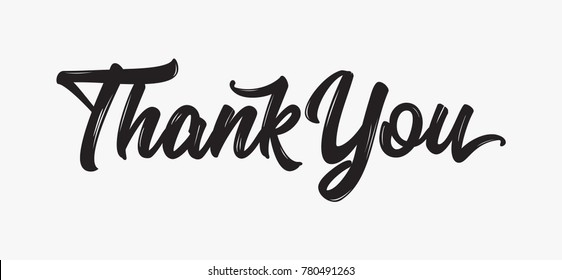